### 0722 과제 1번
- 타이타닉
	- 생존자 중 성별 비율 시각화
	- 나이별 생존자의 성별 비율 비교 시각화
	    * 하나의 figure에 모두 표시


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# 한글폰트 설정 => 폰트 메니저 모듈 사용
from matplotlib import font_manager as fm
from matplotlib import rc

# 사용할 폰트 파일
font_path = r'C:\Users\PC\AppData\Local\Microsoft\Windows\Fonts\NanumMyeongjo.ttf'

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)


In [2]:
file_path = '../data/titanic.csv'

In [3]:
data_df = pd.read_csv(file_path)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
datasets_1 = data_df.loc[:,['survived', 'sex']]
datasets_2 = data_df.loc[:,['survived', 'sex', 'age']]

In [9]:
datasets_1.isna().sum()

survived    0
sex         0
dtype: int64

In [10]:
group_data1 = datasets_1.groupby('sex')

In [12]:
group_data1.describe()

survived                                             
          count      mean       std  min  25%  50%  75%  max
sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

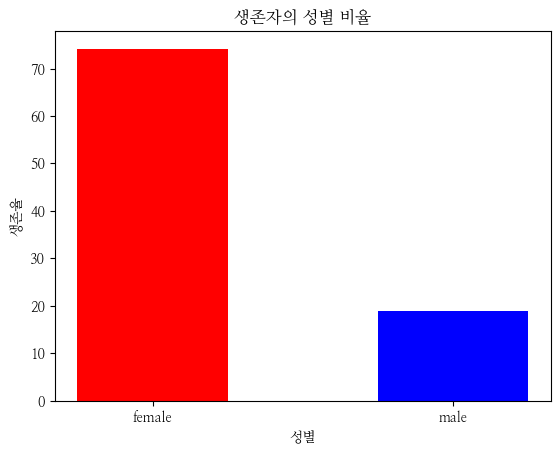

In [39]:
# 생존자의 성별비율 시각화
x_data = list(group_data1.groups.keys())
y_data = group_data1.mean() * 100
y_data = y_data['survived'].to_list()

plt.bar(x_data, y_data, width=0.5, color=['red', 'blue'])
plt.title('생존자의 성별 비율')
plt.xlabel('성별')
plt.ylabel('생존율')
plt.show()

In [41]:
datasets_2.isna().sum()

survived      0
sex           0
age         177
dtype: int64

In [42]:
# 결측치를 어떻게 할까?
# 음....
# 일단은 버리고 그려보자

datasets_2_1 = datasets_2.dropna()
datasets_2_1.isna().sum()


survived    0
sex         0
age         0
dtype: int64

In [47]:
datasets_2_1.set_index(['sex', 'age'])

survived
sex    age           
male   22.0         0
female 38.0         1
       26.0         1
       35.0         1
male   35.0         0
...               ...
female 39.0         0
male   27.0         0
female 19.0         1
male   26.0         1
       32.0         0

[714 rows x 1 columns]

In [52]:
group_data2 = datasets_2_1.groupby(['sex', 'age'])
group_data2.value_counts()

sex     age    survived
female  0.75   1           2
        1.00   1           2
        2.00   0           4
               1           2
        3.00   0           1
                          ..
male    70.00  0           2
        70.50  0           1
        71.00  0           2
        74.00  0           1
        80.00  1           1
Name: count, Length: 216, dtype: int64

In [103]:
# 나이별 생존자...
datasets_2_2 = datasets_2_1[datasets_2_1['survived'] == 1][['sex', 'age']].reset_index(drop='index')
datasets_2_2['age'] = datasets_2_2['age'].sort_values()
datasets_2_2

,sex,age
0,female,38.0
1,female,26.0
2,female,35.0
3,female,27.0
4,female,14.0
...,...,...
285,female,15.0
286,female,56.0
287,female,25.0
288,female,19.0


In [104]:
group_data3 = datasets_2_2.groupby(['sex'])
group_data3.value_counts()

sex     age 
female  24.0    14
        22.0    10
        30.0     9
        18.0     8
        35.0     8
                ..
male    52.0     1
        56.0     1
        60.0     1
        62.0     1
        80.0     1
Name: count, Length: 104, dtype: int64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24216\973671734.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  y_data_1 = group_data3.get_group('female')['age'].to_list()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24216\973671734.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  y_data_2 = group_data3.get_group('male')['age'].to_list()


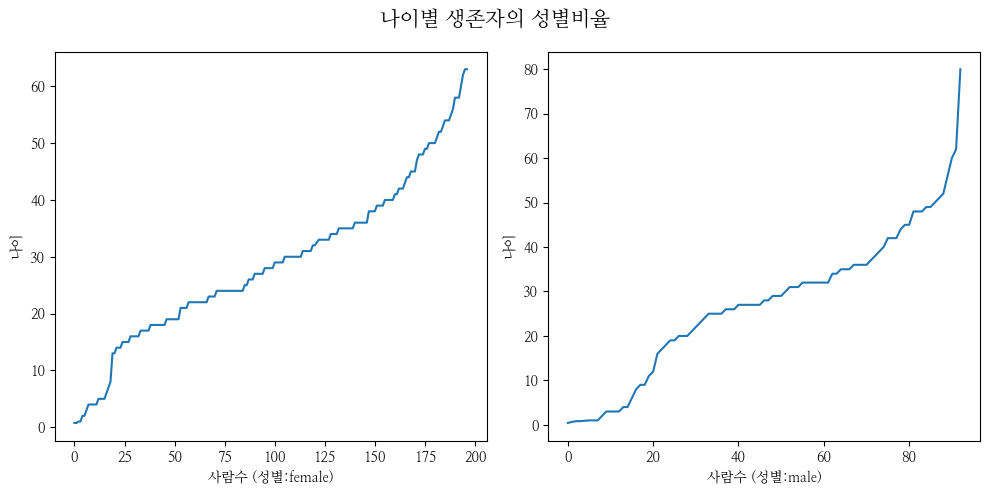

In [123]:
# 생존자의 성별비율 시각화
label = list(group_data3.groups.keys())
y_data_1 = group_data3.get_group('female')['age'].to_list()
y_data_1 = sorted(y_data_1)
y_data_2 = group_data3.get_group('male')['age'].to_list()
y_data_2 = sorted(y_data_2)

y_data_list = [y_data_1, y_data_2]

fig = plt.figure(figsize=[10,5])
axes = fig.subplots(1, 2)

for idx, ax in enumerate(axes):
    ax.plot(y_data_list[idx])
    ax.set_xlabel(f"사람수 (성별:{label[idx]})")
    ax.set_ylabel('나이')

fig.suptitle('나이별 생존자의 성별비율', fontsize=15)


plt.tight_layout()
plt.show()